## Monty Hall Problem using Relative Frequency Approach

* Generate Random samples

###### Import libraries

In [3]:
import random
from datetime import datetime 
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

###### Constants 

In [4]:
NO_OF_DOORS = 3
TRAILS = 1000

###### Build a gift behind one of the doors

In [5]:
def build_gift():
    return random.randint(1,NO_OF_DOORS)

###### Choose a random door at first

In [6]:
def choose_door():
    return random.randint(1,NO_OF_DOORS)

###### Open a door other than the chosen one

In [7]:
def open_door(doors,chosen,gift_pos):
    available_doors = [x for x in doors if x != chosen and x != gift_pos]
    return random.choice(available_doors)

###### Alter a decision

In [8]:
def alter_or_stay():
    return random.randint(0,1)

In [9]:
def alter_door(available_doors):
    return random.choice(available_doors)

###### Play a game
 * Generate random birth days for n adults
 * *__adults_birthdays__* will maintain "month_day" as a key and the number of occurence as value for a particular trail 

In [10]:
def play_game(doors):
    
    gift_pos = build_gift()
    #print ('gift_pos',gift_pos)
    chosen = choose_door()
    #print ('chosen',chosen)
    opened = open_door(doors,chosen,gift_pos)
    #print ('opened',opened)
    doors.remove(opened)
    #print ('doors',doors)
    decision = alter_or_stay()
    #print ('decision',decision)
    if decision:
        doors.remove(chosen)
        chosen = doors[0]
        #print ('chosen',chosen)
    #print ("final : ",decision,int(chosen == gift_pos))
    return decision,int(chosen == gift_pos)

In [11]:
play_game(list(range(1,NO_OF_DOORS+1))[:])

(0, 1)

###### Run trails for a given inputs

In [18]:
def run_trails(trails=TRAILS):
    
    doors = list(range(1,NO_OF_DOORS+1))
    alter_results = {}
    stay_results = {}
    alter_won = 0
    stay_won = 0
    alter_count = 0
    stay_count = 0
    for trail in range(1,trails+1):
        decision,status = play_game(doors[:])
        if decision:
            alter_count += 1
            if status:
                alter_won += 1
                
            alter_results[alter_count] = [(alter_won/alter_count)*100]
        if not decision:
            stay_count += 1
            if status:
                stay_won += 1
            stay_results[stay_count] = [(stay_won/stay_count)*100]
        
    print (stay_count)
    print ((alter_won/alter_count)*100)
    print ((stay_won/stay_count)*100)
    return alter_results,stay_results

##### Run 10000 trails

In [45]:
alter_results,stay_results = run_trails(trails=10)

6
50.0
33.33333333333333


In [46]:
alter_trails_df = pd.DataFrame.from_dict(alter_results,orient='index').reset_index()
alter_trails_df.columns = ['trail','alter_prob']

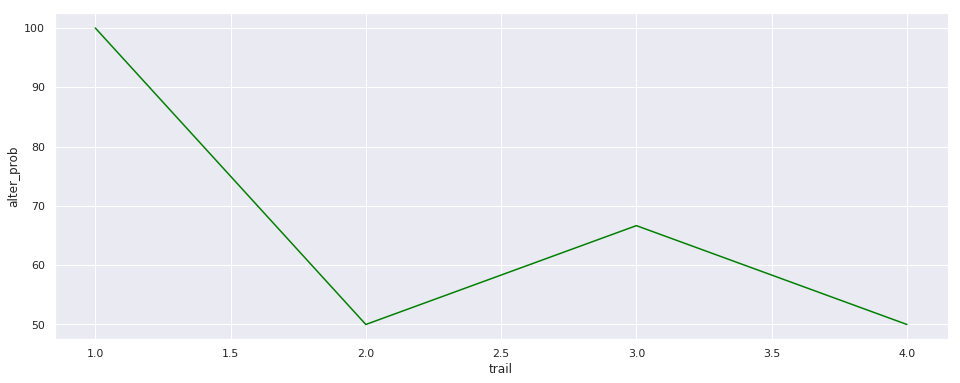

In [47]:
plt.figure(figsize=(16, 6))
ax_ps = sns.lineplot(x="trail", y="alter_prob", color="green",data=alter_trails_df)

In [48]:
stay_trails_df = pd.DataFrame.from_dict(stay_results,orient='index').reset_index()
stay_trails_df.columns = ['trail','stay_prob']

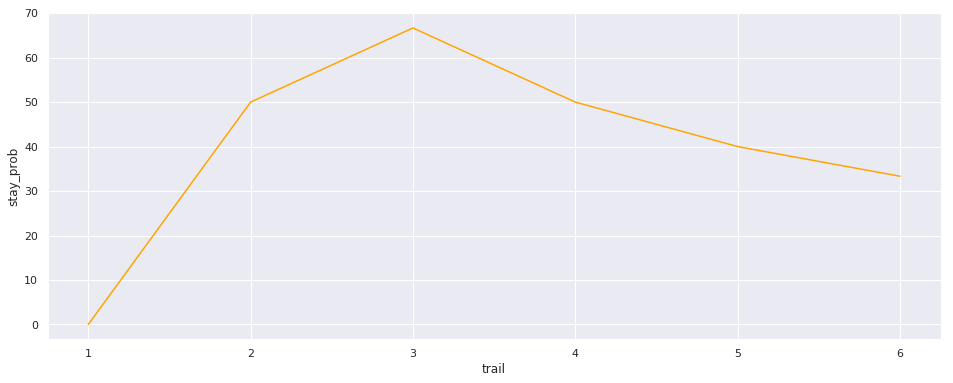

In [49]:
plt.figure(figsize=(16, 6))
ax_pns = sns.lineplot(x="trail", y="stay_prob", color="orange",data=stay_trails_df)